# Testes
 
 Verificando o funcionamento do algoritmo em problemas lineares com n = 2 e problemas de dimensões maiores

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import pandas as pd
from matplotlib.patches import Polygon
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.optimize import linprog
from funcoes_auxiliares import *
from funcoes_graficos import *
from gerador_de_problemas import *
from gradiente_circuncentro import *
from funcoes_tabelas import *
from gradiente_circuncentro_w import *
from scipy import optimize
from gerador_pl_Sokolinsky import *
from gradiente_circuncentro_deslize import *

### Parâmetros da função

In [62]:
#Parametros do problema
# n = dimensões do problema
# d = numero de restricoes

# O resto das restrições são para decidir a forma que o problema linear será gerado de forma aleatória

n = 2
d = 6
alpha = 20
theta = 5
pho = 2
Smin = 5
Lmax = 0.2
amax = 100
bmax = 10000
A,b,c,h  = gera_pl(n,d,alpha,theta,pho,Smin,Lmax,amax,bmax)

### Método circuncentrico em conjunto de restrições ativas

In [67]:
#resolve problema 
historico_solucao, valores_funcao_objetivo, index_ativos, restricoes_ativas, vetores_direcao,lista_alphas,tamanho_passo, gradiente = gradiente_descendente_circuncentrico(h,c,A,b,max_iter=1000000)
df = cria_tabela(historico_solucao, valores_funcao_objetivo, index_ativos, vetores_direcao, lista_alphas, tamanho_passo)
df.tail(3)

,Iteração,Solução (x),valores f,Restrições Ativas,Vetores Direção,Alphas,Tamanhos Passo
22,22,"[18.937967280411765, 11.06203271947738]",-205.310164,[2],"[0.04535513786014572, -0.019933432475731094]",4.360657e-09,2.160377e-10
23,23,"[18.937967280609545, 11.062032719390457]",-205.310164,[10],"[-0.1299465928432948, 0.0936602049066842]",2.598954e-10,4.163003e-11
24,24,"[18.937967280575773, 11.062032719414798]",-205.310164,"[2, 10]",[nan],NaN,NaN


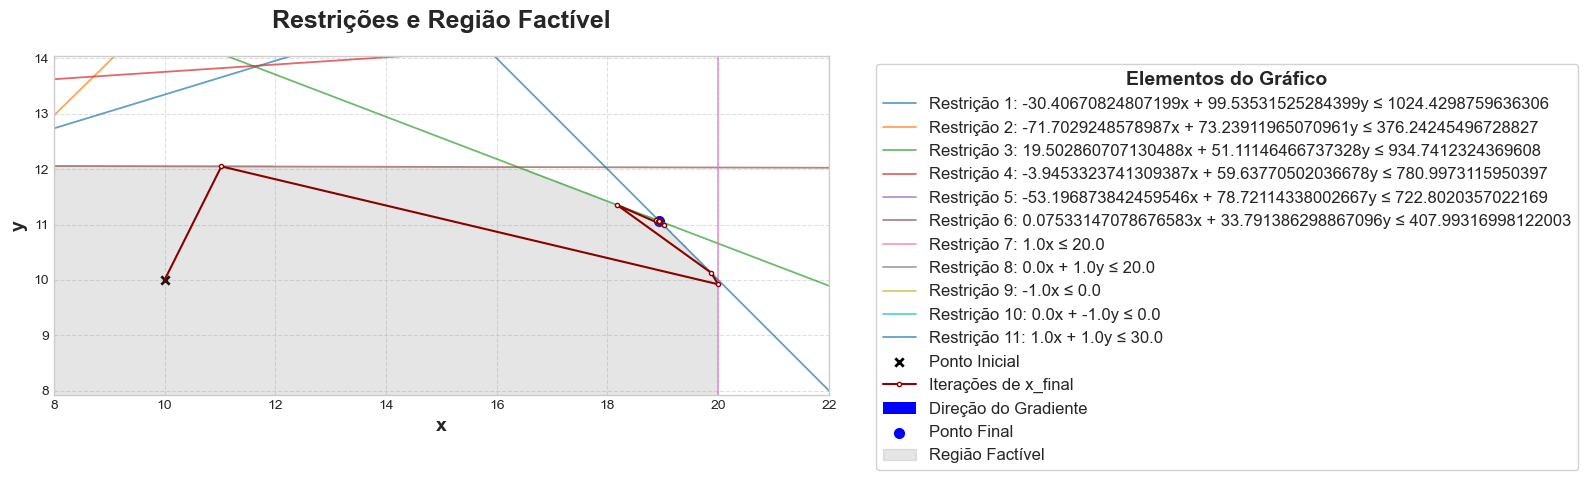

In [68]:
grafico1(historico_solucao,A,b,gradiente)

### Gradiente circuncentrico aproveitando a direção de maxima descida do gradiente

In [69]:
#resolve problema 
historico_solucao, valores_funcao_objetivo, index_ativos, restricoes_ativas, vetores_direcao,lista_alphas,tamanho_passo, gradiente = gradiente_descendente_circuncentrico_w(h,c,A,b,max_iter=1000000)
df = cria_tabela(historico_solucao, valores_funcao_objetivo, index_ativos, vetores_direcao, lista_alphas, tamanho_passo)
df.tail(3)

,Iteração,Solução (x),valores f,Restrições Ativas,Vetores Direção,Alphas,Tamanhos Passo
43,43,"[18.937967280305525, 11.062032719517921]",-205.310164,[2],"[0.04535513786014572, -0.019933432475731094]",6.945075e-09,2.064452e-10
44,44,"[18.937967280494522, 11.062032719434857]",-205.310164,[10],"[-0.1299465928432948, 0.0936602049066842]",2.483389e-10,3.977835e-11
45,45,"[18.937967280462253, 11.062032719458117]",-205.310164,"[2, 10]",[nan],NaN,NaN


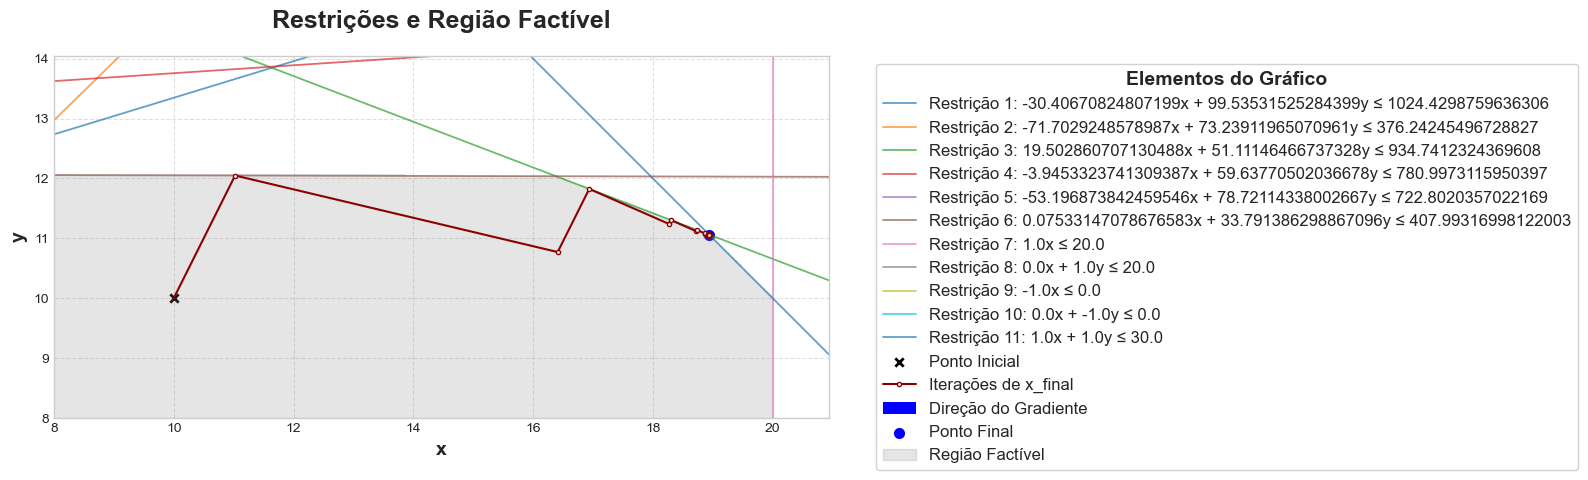

In [70]:
grafico1(historico_solucao,A,b,gradiente)

### Método do Gradiente Circuncentrico com o deslize

In [73]:
historico_solucao, valores_funcao_objetivo, index_ativos, restricoes_ativas, vetores_direcao,lista_alphas,tamanho_passo, gradiente = gradiente_descendente_circuncentrico_modificado(h,c,A,b,max_iter=1000000)
df = cria_tabela(historico_solucao, valores_funcao_objetivo, index_ativos, vetores_direcao, lista_alphas, tamanho_passo)
df.tail(3)

,Iteração,Solução (x),valores f,Restrições Ativas,Vetores Direção,Alphas,Tamanhos Passo
4,4,"[18.17026353770685, 11.354969328822373]",-204.401011,[2],"[0.04535513786014572, -0.019933432475731094]",18.675660,0.925233
5,5,"[19.01730068428769, 10.982699315712312]",-204.913497,[10],"[-0.7071067811865475, 0.7071067811865475]",0.112194,0.112194
6,6,"[18.937967280591018, 11.062032719408982]",-205.310164,"[2, 10]",[nan],NaN,NaN


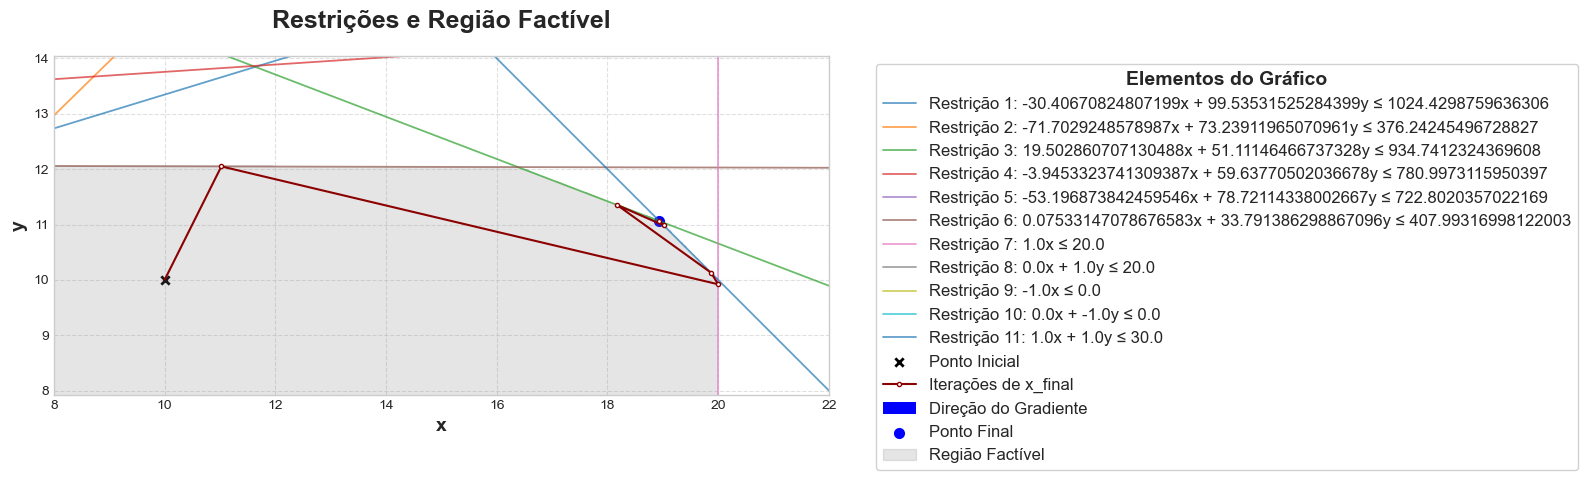

In [74]:
grafico1(historico_solucao,A,b,gradiente)

# Testando para dimensões maiores

In [75]:
#Parametros do problema
# n = dimensões do problema
# d = numero de restricoes

# O resto das restrições são para decidir a forma que o problema linear será gerado de forma aleatória

n = 5
d = 10
alpha = 20
theta = 5
pho = 2
Smin = 5
Lmax = 0.2
amax = 100
bmax = 10000
A,b,c,h  = gera_pl(n,d,alpha,theta,pho,Smin,Lmax,amax,bmax)

### Método circuncentrico em conjunto de restrições ativas

In [76]:
#resolve problema 
historico_solucao, valores_funcao_objetivo, index_ativos, restricoes_ativas, vetores_direcao,lista_alphas,tamanho_passo, gradiente = gradiente_descendente_circuncentrico(h,c,A,b,max_iter=1000000)
df = cria_tabela(historico_solucao, valores_funcao_objetivo, index_ativos, vetores_direcao, lista_alphas, tamanho_passo)
df.tail(3)

,Iteração,Solução (x),valores f,Restrições Ativas,Vetores Direção,Alphas,Tamanhos Passo
1443,1443,"[6.790973849630818, 11.875354692471328, 10.885...",-963.919798,"[5, 7, 9]","[-0.0030629946003195574, 0.0005083560344979476...",8.096648e-10,4.673581e-12
1444,1444,"[6.7909738496283385, 11.87535469247174, 10.885...",-963.919798,"[1, 5, 7, 9]","[-0.0019928366229887973, 0.0009274290041040995...",9.253209e-10,3.708668e-12
1445,1445,"[6.790973849626495, 11.875354692472598, 10.885...",-963.919798,"[1, 5, 7, 8, 9]",[nan],NaN,NaN


### Gradiente circuncentrico aproveitando a direção de maxima descida do gradiente

In [77]:
#resolve problema 
historico_solucao, valores_funcao_objetivo, index_ativos, restricoes_ativas, vetores_direcao,lista_alphas,tamanho_passo, gradiente = gradiente_descendente_circuncentrico_w(h,c,A,b,max_iter=1000000)
df = cria_tabela(historico_solucao, valores_funcao_objetivo, index_ativos, vetores_direcao, lista_alphas, tamanho_passo)
df.tail(3)

,Iteração,Solução (x),valores f,Restrições Ativas,Vetores Direção,Alphas,Tamanhos Passo
3057,3057,"[6.790973849626515, 11.8753546924721, 10.88544...",-963.919798,"[1, 5, 7]","[-0.061972730311493085, 0.0745656210069511, -0...",9.204759e-12,6.498802e-13
3058,3058,"[6.790973849626173, 11.875354692472513, 10.885...",-963.919798,"[1, 5, 7, 9]","[-0.0019928366229887973, 0.0009274290041040995...",2.138638e-10,8.568303e-13
3059,3059,"[6.790973849625747, 11.875354692472712, 10.885...",-963.919798,"[1, 5, 7, 8, 9]",[nan],NaN,NaN


### Método do Gradiente Circuncentrico com o deslize

In [78]:
#resolve problema 
historico_solucao, valores_funcao_objetivo, index_ativos, restricoes_ativas, vetores_direcao,lista_alphas,tamanho_passo, gradiente = gradiente_descendente_circuncentrico_modificado(h,c,A,b,max_iter=1000000)
df = cria_tabela(historico_solucao, valores_funcao_objetivo, index_ativos, vetores_direcao, lista_alphas, tamanho_passo)
df.tail(3)

,Iteração,Solução (x),valores f,Restrições Ativas,Vetores Direção,Alphas,Tamanhos Passo
480,480,"[6.790973849630707, 11.875354692471914, 10.885...",-963.919798,"[9, 5, 7]","[-0.0030629946003195574, 0.0005083560344979476...",1.426943e-09,8.235142e-12
481,481,"[6.7909738496263365, 11.875354692472639, 10.88...",-963.919798,"[1, 5, 9, 7]","[-0.0019928366229887973, 0.0009274290041040995...",2.949294e-10,1.182396e-12
482,482,"[6.790973849625749, 11.875354692472913, 10.885...",-963.919798,"[1, 5, 7, 8, 9]",[nan],NaN,NaN
